In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basics of hierarchical clustering

### Creating a distance matrix using linkage
- method: how to calculate the proximity of clusters
- metric: distance metric
- optimal_ordering: order data points

In [2]:
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates, 
                   'y_coordinate': y_coordinates})

In [3]:
from scipy.cluster.hierarchy import linkage
distance_matrix = linkage(df, 
                          method='single', 
                          metric='euclidean', 
                          optimal_ordering=False)
distance_matrix

array([[ 5.        ,  8.        ,  1.6643317 ,  2.        ],
       [ 2.        ,  4.        ,  3.20624391,  2.        ],
       [12.        , 14.        ,  5.23450093,  2.        ],
       [ 1.        , 16.        ,  6.51920241,  3.        ],
       [ 3.        , 18.        ,  6.54599114,  4.        ],
       [ 6.        ,  9.        ,  7.95110055,  2.        ],
       [ 0.        , 19.        ,  8.16884325,  5.        ],
       [15.        , 20.        , 10.06876358,  4.        ],
       [11.        , 17.        , 11.62755348,  3.        ],
       [ 7.        , 22.        , 11.98540779,  5.        ],
       [10.        , 23.        , 15.30130713,  4.        ],
       [13.        , 25.        , 18.3613725 ,  5.        ],
       [24.        , 26.        , 37.51586331, 10.        ],
       [21.        , 27.        , 65.50854906, 15.        ]])

### Which method should use?
- single: based on two closest objects
- complete: based on two farthest objects
- average: based on the arithmetic mean of all objects
- centroid: based on the geometric mean of all objects
- median: based on hte median of all objects
- ward: based on the sum of squares

### Create cluster labels with fcluster
- distance_matrix: output of linkage() method
- num_clusters: number of clusters
- criterion: how to decide thresholds to form clusters

In [4]:
num_clusters = 3
criterion = 'maxclust'

In [5]:
from scipy.cluster.hierarchy import fcluster
df['cluster_labels'] = fcluster(distance_matrix, 
                                num_clusters, 
                                criterion)
df['cluster_labels']

0     1
1     1
2     1
3     1
4     1
5     2
6     2
7     2
8     2
9     2
10    3
11    3
12    3
13    3
14    3
Name: cluster_labels, dtype: int32

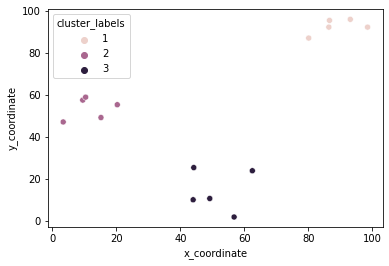

In [6]:
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

### Exercise: Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [7]:
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 
                90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]
y_coordinate = [ 4,  6,  0,  0,  4,  3,  1,  6,  5,  4,  6, 10,  8, 10, 97, 94, 99, 95, 
                95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10,  0, 10,  7, 17, 15]

comic_con = pd.DataFrame({'x_coordinate': x_coordinate, 
                          'y_coordinate': y_coordinate})

from scipy.cluster.vq import whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

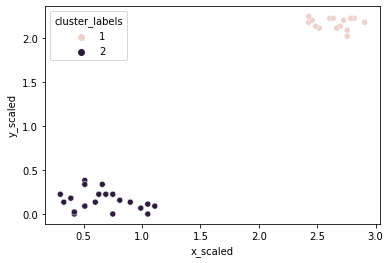

In [8]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Exercise: Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

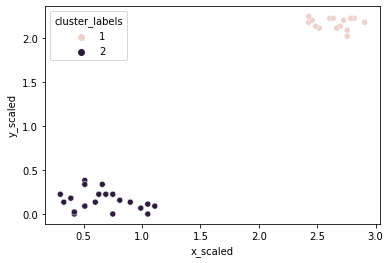

In [9]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Exercise: Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

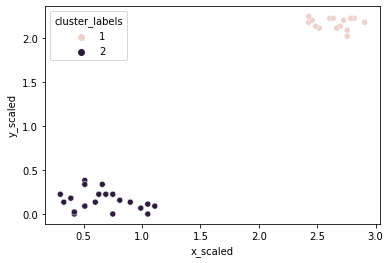

In [10]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, 'maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Exercise: Visualize clusters with matplotlib
We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

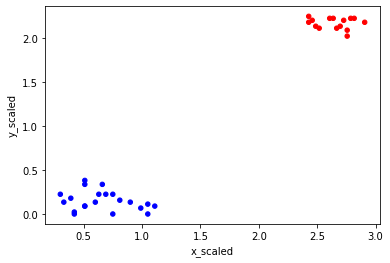

In [11]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

### Exercise: Visualize clusters with seaborn
Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

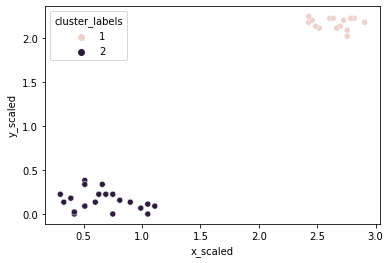

In [12]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

### Exercise: Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

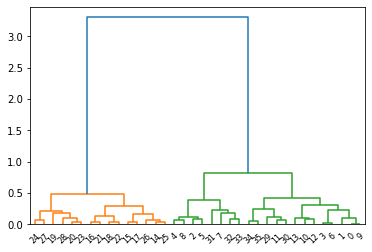

In [13]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

### Exercise: FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a pandas DataFrame, fifa.

In [14]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


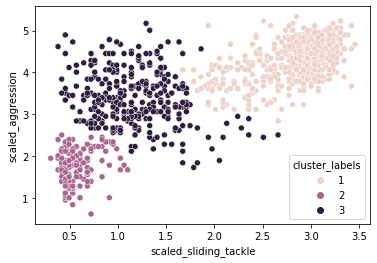

In [15]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()